# Rijn

In [1]:
from os import environ, remove
from configparser import ConfigParser
from glob import glob
from pathlib import Path

import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from cartopy import crs
from cftime import num2date

import hydrostats.metrics as hm

import pickle

from grpc4bmi.bmi_client_docker import BmiClientDocker
from ewatercycle.observation.grdc import get_grdc_data

In [2]:
evap_file = "/mnt/home/user43/Sophie_Bep/Rijn/evap_NL_LOO.csv"
tsdag = pd.read_csv(evap_file, skipinitialspace=True, parse_dates=[0],index_col=0)
tsmaand = pd.read_csv(evap_file)
tsjaar = pd.read_csv(evap_file)

De mean error is -0.272 en de root-mean-squared-error is 0.687


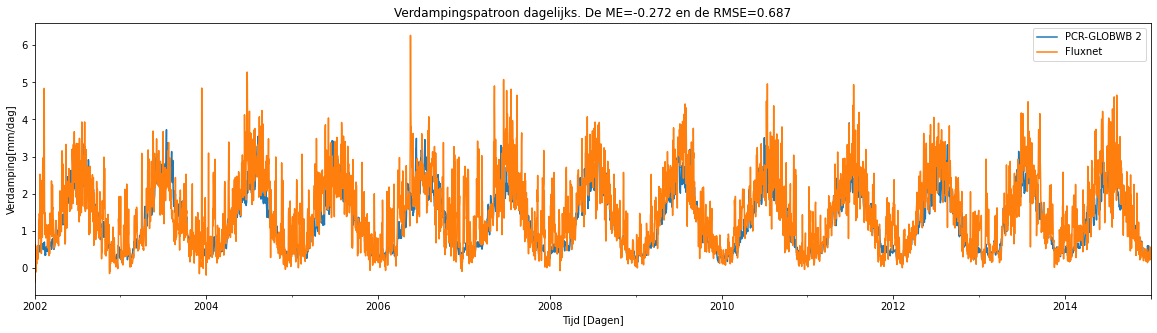

In [3]:
tsdag['verschil'] = tsdag.total_evaporation - tsdag.LE_F_MDS
tsdag['verschilkwadraat'] = (tsdag.total_evaporation - tsdag.LE_F_MDS)**2
MEdag = tsdag['verschil'].sum() / len(tsdag)
RMSEdag = np.sqrt(tsdag['verschilkwadraat'].sum() / len(tsdag))
print(f'De mean error is {MEdag:.3f} en de root-mean-squared-error is {RMSEdag:.3f}')

plt.figure(figsize = (20,5))
tsdag['total_evaporation'].plot(label='PCR-GLOBWB 2')
tsdag['LE_F_MDS'].plot(label='Fluxnet')
plt.title(f'Verdampingspatroon dagelijks. De ME={MEdag:.3f} en de RMSE={RMSEdag:.3f}')
plt.xlabel(f'Tijd [Dagen]')
plt.ylabel(f'Verdamping[mm/dag]')
plt.legend()
plt.savefig('/mnt/home/user43/Sophie_Bep/Rijn/NL_LOO_dag.jpg')

De mean error is -0.400 en de root-mean-squared-error is 0.895


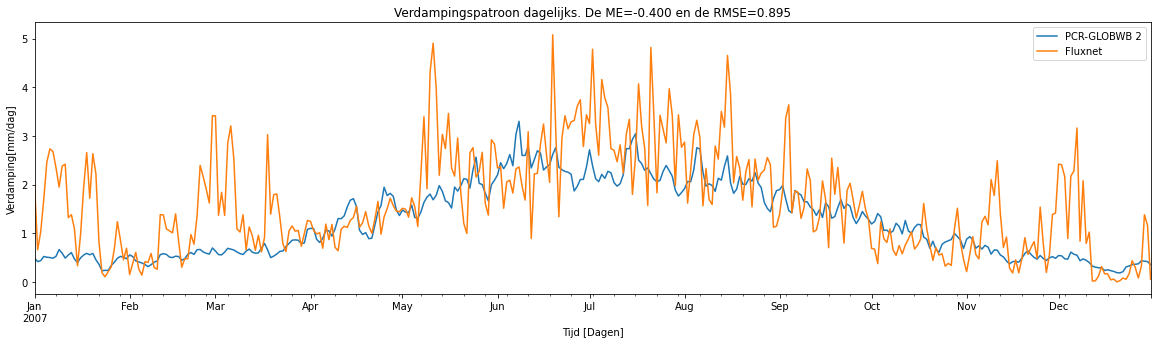

In [4]:
tsdag2007 = tsdag["2007-01-01": '2007-12-31']
MEdag2007 = tsdag2007['verschil'].sum() / len(tsdag2007)
RMSEdag2007 = np.sqrt(tsdag2007['verschilkwadraat'].sum() / len(tsdag2007))
print(f'De mean error is {MEdag2007:.3f} en de root-mean-squared-error is {RMSEdag2007:.3f}')

plt.figure(figsize = (20,5))
tsdag2007['total_evaporation'].plot(label='PCR-GLOBWB 2')
tsdag2007['LE_F_MDS'].plot(label='Fluxnet')
plt.title(f'Verdampingspatroon dagelijks. De ME={MEdag2007:.3f} en de RMSE={RMSEdag2007:.3f}')
plt.xlabel(f'Tijd [Dagen]')
plt.ylabel(f'Verdamping[mm/dag]')
plt.legend()
plt.savefig('/mnt/home/user43/Sophie_Bep/Rijn/NL_LOO_dag2007.jpg')

In [5]:
# Create new column with dtype datetime using original time
tsmaand['Datetime'] = pd.to_datetime(tsmaand['time'])
# Drop old time column
tsmaand = tsmaand.drop(['time'], axis=1)
# Set index
tsmaand = tsmaand.set_index('Datetime')
# Resample to monthly data
tsmaand = tsmaand.resample('M', kind='period').mean()

De mean error is -0.272 en de root-mean-squared-error is 0.380


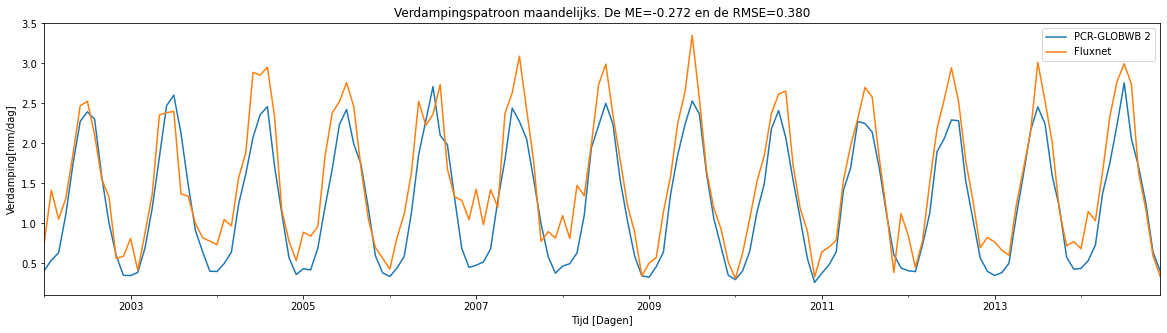

In [6]:
tsmaand['verschil'] = tsmaand.total_evaporation - tsmaand.LE_F_MDS
tsmaand['verschilkwadraat'] = (tsmaand.total_evaporation - tsmaand.LE_F_MDS)**2
MEmaand = tsmaand['verschil'].sum() / len(tsmaand)
RMSEmaand = np.sqrt(tsmaand['verschilkwadraat'].sum() / len(tsmaand))
print(f'De mean error is {MEmaand:.3f} en de root-mean-squared-error is {RMSEmaand:.3f}')

plt.figure(figsize = (20,5))
tsmaand['total_evaporation'].plot(label='PCR-GLOBWB 2')
tsmaand['LE_F_MDS'].plot(label='Fluxnet')
plt.title(f'Verdampingspatroon maandelijks. De ME={MEmaand:.3f} en de RMSE={RMSEmaand:.3f}')
plt.xlabel(f'Tijd [Dagen]')
plt.ylabel(f'Verdamping[mm/dag]')
plt.legend()
plt.savefig('/mnt/home/user43/Sophie_Bep/Rijn/NL_LOO_maand.jpg')

In [7]:
# Create new column with dtype datetime using original time
tsjaar['Datetime'] = pd.to_datetime(tsjaar['time'])
# Drop old time column
tsjaar = tsjaar.drop(['time'], axis=1)
# Set index
tsjaar = tsjaar.set_index('Datetime')
# Resample to monthly data
tsjaar = tsjaar.resample('Y', kind='period').mean()

De mean error is -0.272 en de root-mean-squared-error is 0.283


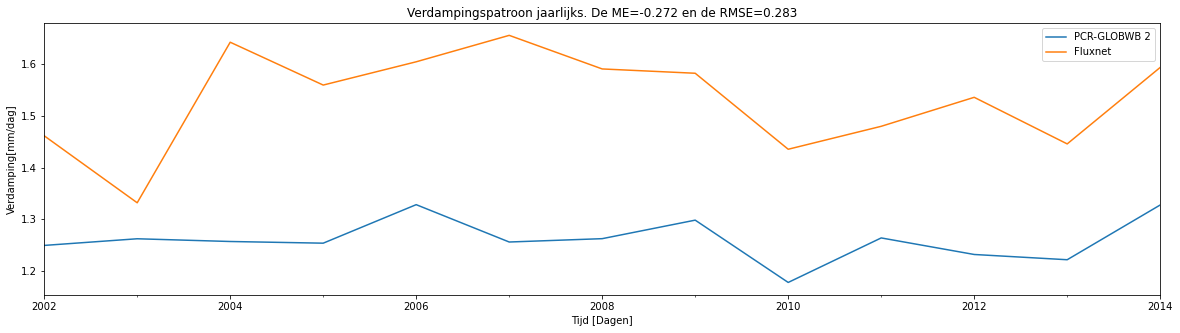

In [8]:
tsjaar['verschil'] = tsjaar.total_evaporation - tsjaar.LE_F_MDS
tsjaar['verschilkwadraat'] = (tsjaar.total_evaporation - tsjaar.LE_F_MDS)**2
MEjaar = tsjaar['verschil'].sum() / len(tsjaar)
RMSEjaar = np.sqrt(tsjaar['verschilkwadraat'].sum() / len(tsjaar))
print(f'De mean error is {MEjaar:.3f} en de root-mean-squared-error is {RMSEjaar:.3f}')

plt.figure(figsize = (20,5))
tsjaar['total_evaporation'].plot(label='PCR-GLOBWB 2')
tsjaar['LE_F_MDS'].plot(label='Fluxnet')
plt.title(f'Verdampingspatroon jaarlijks. De ME={MEjaar:.3f} en de RMSE={RMSEjaar:.3f}')
plt.xlabel(f'Tijd [Dagen]')
plt.ylabel(f'Verdamping[mm/dag]')
plt.legend()
plt.savefig('/mnt/home/user43/Sophie_Bep/Rijn/NL_LOO_jaar.jpg')